- 내용 및 코드 참조, 출처

  - 케라스 창시자로부터 배우는 딥러닝
  - 미술관에 GAN 딥러닝 실전 프로젝트
  - https://suanlab.com/suan/
  - https://www.simplilearn.com/tutorials/deep-learning-tutorial/generative-adversarial-networks-gans
  - https://www.youtube.com/watch?v=LXUvQUoI1xk&t=721s

# 적대적 생성 신경망(Generative Adversarial Networks, GAN)
## 생성형 AI 시대의 조상
### GAN이란 무엇인가?
- GAN은 2014년에 Ian Goodfellow와 연구진에 의해 소개된 모델로, 주로 이미지를 생성하는 데 많이 활용됩니다. 이 모델의 목적은 컴퓨터가 새로운 이미지를 창작하도록 하는 것입니다. GAN은 다른 생성 모델들과 차별화되는 독특한 구조로 설계되었으며, 두 개의 신경망이 경쟁하면서 학습하는 방식으로 작동합니다.

### GAN으로 할 수 있는 것들
<img src="https://i0.wp.com/syncedreview.com/wp-content/uploads/2019/02/image-5.png?resize=1024%2C614&ssl=1" width="700">

### 이미지 스타일 바꾸기
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*dWd0lVTbnu80UZM641gCbw.gif">

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*nKe_kwZoefrELGHh06sbuw.jpeg">

### 이미지 특징 변화

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*KBhcxg87qpYHVyaQlSmf1w.png">

### GAN의 직관적 이해: 위조범과 판매상 비유
  <img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/GAN.PNG" width='600'>

  - GAN을 쉽게 이해하기 위해 위조범과 판매상의 관계로 비유해 보겠습니다. 여기서 위조범은 ‘가짜 그림을 만드는 역할’을 하고, 판매상은 ‘가짜와 진짜를 판별하는 역할’을 합니다.

  1. 위조범은 ‘피카소’의 그림을 따라 그리려는 사람입니다. 처음에는 피카소의 그림을 흉내 내는 데 능숙하지 않아, 누구나 한눈에 가짜임을 알아볼 수 있을 정도로 허술한 그림을 그립니다.

  2. 판매상은 위조범이 그린 그림을 진짜 피카소 그림과 섞어서 보게 되는데, 이 판매상의 역할은 이 그림이 피카소가 그린 진짜 그림인지, 아니면 위조범이 만든 가짜 그림인지 판별하는 것입니다.

  3. 이 과정을 반복하면서, 위조범은 점점 더 피카소 스타일에 가까운 그림을 만들 수 있게 되고, 판매상도 가짜 그림을 판별하는 데 점점 능숙해집니다. 서로의 경쟁을 통해 두 사람은 계속해서 기술을 발전시켜 나가게 되는 것입니다.

  - 처음에는 형편없는 그림을 그리다가 점점 피카소의 스타일을 모방하게 되고  
    판매상은 위조품을 구분하는데 점점 더 전문가가 되어감

### GAN의 구조: 생성자와 판별자 네트워크

  - GAN은 크게 두 가지 네트워크로 구성됩니다.

  1. 생성자 네트워크 (Generator Network)
  - 생성자 네트워크는 가짜 이미지를 만들어내는 역할을 합니다. 이 네트워크는 무작위로 선택한 숫자(잠재 공간의 랜덤 벡터)를 입력으로 받아, 이를 점차 사람이 보기에도 진짜 같은 이미지로 디코딩해냅니다. 예를 들어, 노이즈나 무작위한 숫자를 입력했더니 진짜처럼 보이는 고양이 사진이 생성되는 식입니다.

  2. 판별자 네트워크 (Discriminator Network)
  - 판별자 네트워크는 생성자가 만든 이미지가 실제 이미지인지 가짜 이미지인지를 판별하는 역할을 합니다. 훈련 중에 판별자는 진짜와 가짜 이미지를 반복적으로 보며, 이를 통해 가짜 이미지를 감별하는 능력을 키웁니다.

  - 이 두 네트워크는 서로 ‘경쟁적’ 관계로 학습하며, GAN의 이름인 적대적 생성이라는 개념이 여기서 나옵니다. 생성자는 판별자를 속이기 위해 노력하고, 판별자는 속지 않기 위해 노력하는 것이죠.

  - 판별자 네트워크(discriminator netowrk)

    - 이미지(실제 또는 가짜 이미지)를 입력으로 받아 훈련 세트에서 온 이미지인지 생성자가 만든 이미지인지 판별

<img src="https://paperswithcode.com/media/methods/gan.jpeg" width="700">

<sub>[이미지 출처] https://paperswithcode.com/method/gan</sub>

### GAN 학습의 어려움: 최적화와 평형점 찾기

  - GAN의 학습 과정은 일반적인 신경망과는 다소 다릅니다.
  1. 고정되지 않은 손실 공간: 일반적인 신경망 학습에서는 손실 공간이 고정되어 있고, 이 공간에서 손실을 줄이기 위해 언덕을 내려가는 방식으로 훈련합니다(경사하강법). 그러나 GAN에서는 생성자와 판별자가 동시에 학습하므로 손실 공간이 고정되지 않고 매번 바뀝니다.
  2. 두 네트워크의 평형점 찾기: GAN은 두 신경망이 균형을 이루는 ‘평형점’을 찾는 것이 목표입니다. 하지만 이 평형점을 찾는 것은 매우 어렵습니다. 생성자가 너무 강해지면 판별자가 속기 쉽고, 판별자가 너무 강해지면 생성자가 학습하기 어렵기 때문에 적절한 파라미터 조정이 필요합니다.
  3. 학습 난이도: 이러한 이유로 GAN은 훈련이 어렵고, 적절한 학습 방법과 파라미터 설정이 중요합니다. 초반에 성능이 좋지 않더라도, 반복적인 학습을 통해 생성자가 점점 더 실제 같은 이미지를 생성하도록 만드는 것이 목표입니다.
  4. 주어진 데이터에 대해 적대적 생성 신경망을 학습시킨다면 대부분의 경우 모드 붕괴 (mode-collapse)에 도달하게 되며 노이즈에 가까운 이미지가 생성되게 되는데, 이를 방지하기 위해 모델 아키텍처와 학습 데이터, 하이퍼 파라미터 등 다양한 요소의 최적화가 중요함

## GAN의 구현 (DCGAN)

- CIFAR10 데이터셋 사용

- generator 네트워크는 (latent_dim,) 크기의 벡터를 (32, 32, 3) 크기의 이미지로 매핑

- discriminator 네트워크는 (32, 32, 3) 크기의 이미지가 진짜일 확률을 추정하여 이진값으로 매핑

- 생성자와 판별자를 연결하는 gan 네트워크를 만듬  
  
  - gan(x) = discriminator(generator(x))

- 진짜/가짜 레이블과 함께 진짜 이미지와 가짜 이미지 샘플을 사용하여 판별자를 훈련 (일반적인 이미지 분류 모델 훈련과 동일)

- 생성자를 훈련하려면 gan 모델의 손실에 대한 생성자 가중치의 그래디언트를 사용

  - 매 단계마다 생성자에 의해 디코딩된 이미지를 판별자가 "진짜"로 분류하도록 만다는 방향으로 생성자의 가중치를 이동

  - 판별자를 속이도록 생성자를 훈련한다는 말


## 학습 방법

- 마지막 활성화 함수로 sigmoid 대신 tanh함수 사용

- 균등분포가 아니고 정규 분포(가우시안 분포)를 사용하여 잠재 공간에서 포인트를 샘플링

- 무작위성을 주입

  - 판별자에 드롭아웃을 사용

  - 판별자를 위해 레이블에 랜덤 노이즈를 추가

- 희소한 그래디언트는 GAN 훈련에 방해가 될 수 있음

  - 최대 풀링 대신 스트라이드 합성곱을 사용하여 다운샘플링

  - ReLU 대신 LeakyReLU 사용

- 생성자에서 픽셀 공간을 균일하게 다루지 못하여 생성된 이미지에서 체스판 모양이 종종 나타남.  
  이를 위해 생성자와 판별자에서 스트라이드 Conv2DTranpose나 Conv2D를 사용할 때 스트라이드 크기로 나누어 질 수 있는 커널 크기 사용

  - 커널 크기가 스트라이드의 배수가 아니면 픽셀이 공평하게 합성곱 되지 않음  
    커널 크기를 스트라이드로 나누었을 때 나머지 크기에 해당하는 픽셀이 더 많이 업샘플링에 참여하게 됨

In [ ]:
# !pip uninstall tensorflow -y
# !pip install tensorflow==2.8
# !pip install keras==2.8
# import keras
# keras.__version__

### GAN 생성자 네트워크


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Reshape, Conv2D, Conv2DTranspose, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# 잠재 공간(latent space) 차원과 이미지의 기본 설정 정의
latent_dim = 32      # 생성자 입력으로 사용할 잠재 공간의 차원
height = 32          # 생성할 이미지의 높이
width = 32           # 생성할 이미지의 너비
channels = 3         # 이미지의 채널 수 (RGB를 위한 3 채널)

In [ ]:
# # 생성자 모델 구성
def build_generator(latent_dim):
    # 모델을 순차적으로 구성하기 위해 tf.keras.Sequential을 사용합니다.
    model = tf.keras.Sequential([
        # 첫 번째 층은 입력된 잠재 벡터(latent vector)를 4x4x256 크기로 확장하는 Dense 층입니다.
        # latent_dim의 크기를 가진 벡터를 입력받아 4*4*256 = 4096개의 뉴런으로 연결합니다.
        Dense(4*4*256, input_dim=latent_dim),

        # 비선형성을 추가하여 모델이 더욱 복잡한 패턴을 학습할 수 있도록 LeakyReLU 활성화 함수를 사용합니다.
        LeakyReLU(alpha=0.2),  # alpha=0.2는 음의 입력에 대해 출력이 20%로 유지됨을 의미합니다.

        # Reshape 층을 사용해 4096개의 노드를 (4, 4, 256) 크기의 텐서로 변환합니다.
        # 이는 4x4 크기의 특징맵 256개로 생각할 수 있습니다.
        Reshape((4, 4, 256)),

        # Conv2DTranspose 층은 스트라이드가 (2,2)인 전치 합성곱 층으로, 특징맵의 크기를 2배로 늘립니다.
        # 4x4 -> 8x8 크기의 128개의 필터로 확장됩니다.
        Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'),
        LeakyReLU(alpha=0.2),

        # 두 번째 전치 합성곱 층입니다. 스트라이드가 (2,2)이므로 크기는 8x8 -> 16x16로 증가합니다.
        # 64개의 필터를 사용해 이미지의 복잡한 패턴을 점점 더 추가합니다.
        Conv2DTranspose(64, (4,4), strides=(2,2), padding='same'),
        LeakyReLU(alpha=0.2),

        # 세 번째 전치 합성곱 층입니다. 이번에도 크기가 2배로 증가하여 16x16 -> 32x32로 변환됩니다.
        # 32개의 필터로 좀 더 정교한 특징을 추가합니다.
        Conv2DTranspose(32, (4,4), strides=(2,2), padding='same'),
        LeakyReLU(alpha=0.2),

        # 마지막 Conv2D 층은 출력층으로서 이미지 채널 수를 3(RGB)으로 맞추고, 활성화 함수로 tanh를 사용해 [-1, 1] 범위로 정규화합니다.
        # 생성된 이미지의 크기는 32x32x3이 됩니다.
        Conv2D(3, (3,3), activation='tanh', padding='same')
    ])
    return model

# latent_dim은 생성자의 입력으로 사용되는 잠재 공간 벡터의 차원입니다.
generator = build_generator(latent_dim)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
#generator = Model(generator_input, x) # 잠재 공간 입력을 받아 (32, 32, channels) 이미지 출력
generator.summary() # 모델 구조 출력

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4096)                │         135,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 32)          │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 824,387 (3.14 MB)

 Trainable params: 824,387 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

### GAN 판별자 네트워크


In [ ]:
# # 판별자 모델 정의
def build_discriminator(in_shape=(32,32,3)):
    # 마찬가지로 tf.keras.Sequential을 사용해 모델을 구성합니다.
    model = tf.keras.Sequential([
        # 첫 번째 Conv2D 층은 입력 이미지를 32개의 필터로 필터링하여 특징 추출을 수행합니다.
        # (32, 32, 3) 입력을 (16, 16, 32)로 다운샘플링하며 특징을 추출합니다.
        Conv2D(32, (3,3), strides=(2,2), padding='same', input_shape=in_shape),
        LeakyReLU(alpha=0.2),  # LeakyReLU로 비선형성을 추가합니다.
        Dropout(0.3),  # Dropout을 사용해 일부 노드를 비활성화하여 과적합을 방지합니다.

        # 두 번째 Conv2D 층은 64개의 필터로 입력 이미지를 다운샘플링합니다.
        # (16, 16, 32) -> (8, 8, 64)로 변환됩니다.
        Conv2D(64, (3,3), strides=(2,2), padding='same'),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),

        # 세 번째 Conv2D 층은 128개의 필터로 입력 이미지를 다운샘플링합니다.
        # (8, 8, 64) -> (4, 4, 128)로 변환됩니다.
        Conv2D(128, (3,3), strides=(2,2), padding='same'),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),

        # Flatten 층을 통해 다차원 텐서를 1차원 벡터로 변환합니다. (4, 4, 128) -> (2048)
        Flatten(),

        # Dense 층을 통해 최종적으로 단일 노드를 출력하며, sigmoid 활성화 함수로 [0, 1] 범위의 값(진짜/가짜)을 예측합니다.
        Dense(1, activation='sigmoid')
    ])
    return model

# 판별자 모델을 빌드하고, 모델 구조를 확인하기 위해 summary() 메서드를 호출합니다.
discriminator = build_discriminator()
discriminator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,297 (372.25 KB)

 Trainable params: 95,297 (372.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# 판별자 모델 컴파일
discriminator_optimizer = RMSprop(learning_rate=0.0004, clipvalue=1.0, decay=1e-8)
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy')

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


### 적대적 네트워크
- 생성자와 판별자를 연결

- 훈련할 때 생성자가 판별자를 속이는 능력이 커지도록 학습

- 잠재 공간의 포인트를 진짜 또는 가짜의 분류 결정으로 변환

- 훈련에 사용되는 target label은 항상 "진짜 이미지"

- 훈련하는 동안 판별자를 동결(학습되지 않도록)하는 것이 매우 중요!

  - 판별자의 가중치가 훈련하는 동안 업데이트되면 판별자는 항상 진짜를 예측하도록 훈련됨

In [ ]:
# 판별자를 GAN 훈련에서 제외하기 위해 가중치를 고정
discriminator.trainable = False

# 전체 GAN 모델 구성
gan_input = Input(shape=(latent_dim,))  # 잠재 벡터를 입력으로 받음
gan_output = discriminator(generator(gan_input))  # 생성자 -> 판별자 순으로 연결하여 GAN 생성
gan = Model(gan_input, gan_output)

# GAN 모델 컴파일
gan_optimizer = RMSprop(learning_rate=0.004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy') # 생성된 이미지의 진짜/가짜 여부를 판별

### GAN 구현(DCGAN, 2015, https://arxiv.org/abs/1511.06434)

- DCGAN(2015) : 기본 GAN 모델에 **합성곱 신경망(Convolutional Neural Network, CNN)**을 도입해 성능을 개선한 모델.
- 이미지 생성에 강력한 성능을 보임
- Pooling을 사용하지 않음: DCGAN은 풀링(Pooling) 대신 스트라이드 합성곱(strided convolution)을 사용해 다운샘플링과 업샘플링을 수행

### 학습 과정
- 매 반복마다 아래의 과정 수행

  1. 잠재 공간에서 무작위로 포인트를 뽑음(랜덤 노이즈)

  2. 랜덤 노이즈를 사용하여 generator에서 이미지를 생성

  3. 생성된 이미지와 진짜 이미지를 섞음

  4. 진짜와 가짜가 섞인 이미지와 이에 대응하는 타깃을 사용하여 discriminator를 훈련  
    타킷은 진짜 또는 가짜

  5. 잠재 공간에서 무작위로 새로운 포인트를 뽑음

  6. 랜덤 벡터를 사용하여 gan을 훈련.  
    모든 타깃은 진짜로 설정.
    - 판별자가 생성된 이미지를 모두 "진짜 이미지"라고 예측하도록 생성자의 가중치를 업데이트.  
      (판별자는 동결되기 때문에 생성자만 업데이트)

#### CIFAR10 데이터 로드

In [ ]:
import os
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

#### 개구리 이미지를 선택

In [ ]:
(x_train, y_train), (_, _) = cifar10.load_data()
x_train = x_train[y_train.flatten() == 6] # 개구리 이미지만

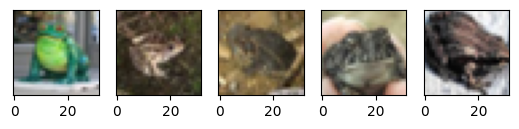

In [ ]:
for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(x_train[i])
    plt.yticks([])

#### 데이터 정규화

In [ ]:
x_train = (x_train.astype('float32') - 127.5) / 127.5

In [ ]:
iterations = 5000
batch_size = 32

save_dir = './gan_images'
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

#### 학습

In [ ]:
# 배치의 시작 인덱스를 설정합니다.
start = 0
# 총 'iterations' 횟수만큼 학습 반복을 수행합니다.
for step in range(iterations):
    # 1. 판별자 학습을 위한 잠재 공간의 랜덤 벡터 생성
    # latent_dim 차원의 랜덤 노이즈 벡터를 'batch_size'만큼 샘플링하여 생성자의 입력으로 사용
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))

    # 2. 생성자로부터 가짜 이미지 생성
    # 생성자는 입력받은 잠재 벡터로부터 가짜 이미지를 생성합니다.
    generated_images = generator.predict(random_latent_vectors)

     # 3. 실제 이미지 배치 선택
    stop = start + batch_size  # 현재 배치의 끝 인덱스를 계산합니다.
    real_images = x_train[start: stop] # 선택된 범위의 실제 이미지를 'real_images'로 가져옵니다.

    # 4.가짜 이미지와 실제 이미지를 결합하여 판별자 입력 생성
    combined_images = np.concatenate([generated_images, real_images])

    # 5. 판별자 입력에 맞는 라벨 생성
    # 가짜 이미지를 '1'(진짜로 인식하도록)로, 실제 이미지를 '0'으로 설정하여 라벨을 생성
    labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])

    # 6. 라벨에 노이즈 추가 (훈련의 안정성 향상을 위한 트릭)
    # 라벨에 작은 랜덤 값을 더해 노이즈를 추가하여 모델이 지나치게 확신하지 않도록 합니다.
    # 판별자의 학습이 지나치게 빠르게 이뤄지면, 생성자와 판별자의 균형이 깨져 제대로 학습되지 않을 수 있습니다.
    labels += 0.05 * np.random.random(labels.shape)

    # 7. 판별자 훈련
    # 'train_on_batch'를 사용해 결합된 이미지와 라벨로 판별자를 학습시킵니다.
    d_loss = discriminator.train_on_batch(combined_images, labels)

    # 8. 생성자 훈련을 위한 새로운 잠재 벡터 생성
    # 생성자 학습을 위해 새로운 노이즈 벡터를 생성합니다.
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))

    # 9. 생성자 학습을 위한 "미끼 라벨" 생성
    # 생성자가 판별자를 속이도록 하기 위해 모든 라벨을 '0'(실제 이미지로 인식되게)으로 설정
    misleading_targets = np.zeros((batch_size, 1))

    # 10. GAN을 사용한 생성자 학습
    # GAN 모델을 통해 생성자를 학습합니다. 이 과정에서는 판별자의 가중치가 고정됩니다.
    a_loss = gan.train_on_batch(random_latent_vectors, misleading_targets)

     # 11. 배치 시작 인덱스 갱신
    start += batch_size
    if start > len(x_train) - batch_size:
        start = 0

    if step % 100 == 0:
        gan.save_weights('gan.weights.h5')

        print(f'스텝 {step}에서 생성자 손실: {d_loss}. 판별자 손실: {a_loss}')

        # 13. 생성된 이미지와 실제 이미지 저장
        img = image.array_to_img(generated_images[0] * 255., scale=False)
        plt.imshow(img)
        plt.clf()
        img.save(os.path.join(save_dir, 'generated_frog' + str(step) + '.png'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


스텝 0에서 생성자 손실: 0.7022923231124878. 판별자 손실: [array(0.7022923, dtype=float32), array(0.7022923, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━

<Figure size 640x480 with 0 Axes>

#### 이미지 생성을 통한 시각화


- 잠재 공간에서 랜덤한 포인트를 샘플링


In [ ]:
random_latent_vectors = np.random.normal(size=(10, latent_dim))

- 가짜 이미지로 디코딩

In [ ]:
generated_images = generator.predict(random_latent_vectors)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


In [ ]:
print(generated_images.shape)

(10, 32, 32, 3)


In [ ]:
plt.figure(figsize=(10, 10))
for i in range(generated_images.shape[0]):
    img = image.array_to_img(generated_images[i] * 255., scale=False)
    plt.subplot(5, 2, i + 1)
    plt.imshow(img)
plt.show